In [1]:
import pypsa
import numpy as np
import random
random.seed(69)
network = pypsa.Network()

In [2]:
#Add 8 buses
for i in range(8):
    network.add("Bus","My bus {}".format(i))

In [3]:
edges = [(0,1),(0,3),(0,4),(0,5),(1,3),(1,7),(1,2),(2,6),(2,7),(3,4),(3,5),(3,6),(5,6),(6,7)]

In [4]:
#add three lines in a ring
for i in range(len(edges)):
    network.add("Line","My line {}".format(i),
                bus0="My bus {}".format(edges[i][0]),
                bus1="My bus {}".format(edges[i][1]),
                x=0.0001,
                s_nom=60)
print(network.lines)

attribute       bus0      bus1 type       x    r    g    b  s_nom  \
My line 0   My bus 0  My bus 1       0.0001  0.0  0.0  0.0   60.0   
My line 1   My bus 0  My bus 3       0.0001  0.0  0.0  0.0   60.0   
My line 2   My bus 0  My bus 4       0.0001  0.0  0.0  0.0   60.0   
My line 3   My bus 0  My bus 5       0.0001  0.0  0.0  0.0   60.0   
My line 4   My bus 1  My bus 3       0.0001  0.0  0.0  0.0   60.0   
My line 5   My bus 1  My bus 7       0.0001  0.0  0.0  0.0   60.0   
My line 6   My bus 1  My bus 2       0.0001  0.0  0.0  0.0   60.0   
My line 7   My bus 2  My bus 6       0.0001  0.0  0.0  0.0   60.0   
My line 8   My bus 2  My bus 7       0.0001  0.0  0.0  0.0   60.0   
My line 9   My bus 3  My bus 4       0.0001  0.0  0.0  0.0   60.0   
My line 10  My bus 3  My bus 5       0.0001  0.0  0.0  0.0   60.0   
My line 11  My bus 3  My bus 6       0.0001  0.0  0.0  0.0   60.0   
My line 12  My bus 5  My bus 6       0.0001  0.0  0.0  0.0   60.0   
My line 13  My bus 6  My bus 7    

/Users/elimendels/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


(<matplotlib.collections.PatchCollection at 0x7facec2c1510>,
 <matplotlib.collections.LineCollection at 0x7facec31cdd0>)

/Users/elimendels/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



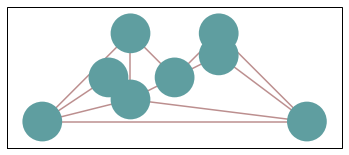

In [5]:
network.plot()

In [6]:
#add a generator at bus 2
network.add("Generator","My gen 2",
            bus="My bus 2",
            p_nom=300,
            marginal_cost=random.randint(25,75))
#add a generator at bus 3
network.add("Generator","My gen 3",
            bus="My bus 3",
            p_nom=300,
            marginal_cost=random.randint(25,75))
#add a generator at bus 4
network.add("Generator","My gen 4",
            bus="My bus 4",
            p_nom=300,
            marginal_cost=random.randint(25,75))



In [7]:
#add loads
for i in [0,1,5,6,7]:
    network.add("Load",f"My load {i}",
                bus=f"My bus {i}",
                p_set=random.randint(25,125))


print(network.loads)

print(network.loads.p_set)

attribute       bus carrier type  p_set  q_set  sign
My load 0  My bus 0                46.0    0.0  -1.0
My load 1  My bus 1                33.0    0.0  -1.0
My load 5  My bus 5               102.0    0.0  -1.0
My load 6  My bus 6                69.0    0.0  -1.0
My load 7  My bus 7                66.0    0.0  -1.0
My load 0     46.0
My load 1     33.0
My load 5    102.0
My load 6     69.0
My load 7     66.0
Name: p_set, dtype: float64


In [8]:
#Do a linear OPF

def my_f(network,snapshots):
    print(snapshots)


network.lopf(extra_functionality=my_f,pyomo=False,solver_name='gurobi')

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.2s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Index(['now'], dtype='object')
Restricted license - for non-production use only - expires 2023-10-25
Read LP format model from file /var/folders/0q/5lc1d7h56xb6b4knvq6fckkm0000gn/T/pypsa-problem-p5vmtq3j.lp
Reading time = 0.00 seconds
obj: 49 rows, 18 columns, 89 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 49 rows, 18 columns and 89 nonzeros
Model fingerprint: 0xe8a610a0
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 3e+02]
Presolve removed 34 rows and 1 columns
Presolve time: 0.07s
Presolved: 15 rows, 17 columns, 55 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.579881e+02   0.000000e+00      0s
      10    1.2349333e+04   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.10 seconds (0.0

INFO:pypsa.linopf:Optimization successful. Objective value: 1.23e+04


('ok', 'optimal')

In [9]:
#Cheap generator 1 cannot be fully dispatched because of network constraints,
#so expensive generator 0 also has to dispatch
network.generators_t.p

,My gen 2,My gen 3,My gen 4
now,84.0,138.666667,93.333333


In [10]:
#network flows
(network.lines_t.p0)

,My line 0,My line 1,My line 2,My line 3,My line 4,My line 5,My line 6,My line 7,My line 8,My line 9,My line 10,My line 11,My line 12,My line 13
now,7.333333,-26.666667,-60.0,33.333333,-34.0,22.916667,-14.583333,31.916667,37.5,-33.333333,60.0,51.333333,-8.666667,5.583333


In [11]:
#Line 1 is congested
abs(network.lines_t.p0)/network.lines.s_nom

,My line 0,My line 1,My line 2,My line 3,My line 4,My line 5,My line 6,My line 7,My line 8,My line 9,My line 10,My line 11,My line 12,My line 13
now,0.122222,0.444444,1.0,0.555556,0.566667,0.381944,0.243056,0.531944,0.625,0.555556,1.0,0.855556,0.144444,0.093056


In [12]:
#Power flows towards lower voltage angles
(network.buses_t.p)

,My bus 0,My bus 1,My bus 2,My bus 3,My bus 4,My bus 5,My bus 6,My bus 7
now,-46.0,-33.0,84.0,138.666667,93.333333,-102.0,-69.0,-66.0


In [13]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
My line 0,My bus 0,My bus 1,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 1,My bus 0,My bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 2,My bus 0,My bus 4,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 3,My bus 0,My bus 5,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 4,My bus 1,My bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 5,My bus 1,My bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 6,My bus 1,My bus 2,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 7,My bus 2,My bus 6,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 8,My bus 2,My bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 9,My bus 3,My bus 4,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0


In [14]:
network.remove("Line","My line 2")
network.remove("Line","My line 9")


In [15]:
network.lopf(extra_functionality=my_f,pyomo=False,solver_name='gurobi')

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.18s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Index(['now'], dtype='object')
Read LP format model from file /var/folders/0q/5lc1d7h56xb6b4knvq6fckkm0000gn/T/pypsa-problem-xqvjgq5i.lp
Reading time = 0.00 seconds
obj: 44 rows, 16 columns, 78 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 44 rows, 16 columns and 78 nonzeros
Model fingerprint: 0x0112ac27
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 3e+02]
Presolve removed 31 rows and 2 columns
Presolve time: 0.04s
Presolved: 13 rows, 14 columns, 47 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   9.642310e+02   0.000000e+00      0s
       7    1.4928000e+04   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.12 seconds (0.00 work units)
Optimal objective  1.492800000e+04


INFO:pypsa.linopf:Optimization successful. Objective value: 1.49e+04


('ok', 'optimal')

In [16]:
#Cheap generator 1 cannot be fully dispatched because of network constraints,
#so expensive generator 0 also has to dispatch
network.generators_t.p

,My gen 2,My gen 3,My gen 4
now,156.0,160.0,0.0


In [17]:
#network flows
(network.lines_t.p0)

,My line 0,My line 1,My line 3,My line 4,My line 5,My line 6,My line 7,My line 8,My line 10,My line 11,My line 12,My line 13
now,-20.666667,-42.666667,17.333333,-22.0,11.916667,-43.583333,56.916667,55.5,60.0,35.333333,-24.666667,-1.416667


In [18]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
My line 0,My bus 0,My bus 1,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 1,My bus 0,My bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 3,My bus 0,My bus 5,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 4,My bus 1,My bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 5,My bus 1,My bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 6,My bus 1,My bus 2,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 7,My bus 2,My bus 6,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 8,My bus 2,My bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 10,My bus 3,My bus 5,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
My line 11,My bus 3,My bus 6,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0


In [25]:
network.loads['p_set'].sum()

316.0